In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt
!pip install folium
import geopy

import folium  #needed for interactive map
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score
cmap = sns.diverging_palette(220, 10, as_cmap=True)
%matplotlib inline
sns.set()

## Loading all the Datasets

In [2]:
listings = pd.read_csv("listings.csv", delimiter = ',')
venues = pd.read_csv("venues.csv", delimiter = ',')
demographics = pd.read_csv("demographics.csv", delimiter = ',')
real_estate = pd.read_csv("real_estate.csv", delimiter = ',')
calendar = pd.read_csv("calendar.csv", delimiter = ',')


## Peeking inside the datasets


### Listings.csv

In [3]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464


In [4]:
listings.shape

(59824, 29)

In [5]:
listings.nunique()

accommodates                      16
amenities                      51780
availability_30                   31
bathrooms                         16
bed_type                           5
bedrooms                          11
beds                              17
cancellation_policy                7
city                             133
has_availability                   0
host_id                        47743
id                             59824
instant_bookable                   2
latitude                       59824
longitude                      59824
metropolitan                       5
name                           58689
price                            697
property_type                     32
review_scores_checkin              9
review_scores_cleanliness          9
review_scores_communication        9
review_scores_location             9
review_scores_rating              56
review_scores_value                9
room_type                          3
state                              9
w

In [6]:
listings.isnull().sum()

accommodates                      61
amenities                          0
availability_30                    0
bathrooms                        202
bed_type                           0
bedrooms                          95
beds                             109
cancellation_policy                0
city                              46
has_availability               59824
host_id                            0
id                                 0
instant_bookable                   0
latitude                           0
longitude                          0
metropolitan                       0
name                              41
price                              0
property_type                      4
review_scores_checkin          14346
review_scores_cleanliness      14280
review_scores_communication    14285
review_scores_location         14349
review_scores_rating           14200
review_scores_value            14354
room_type                          0
state                              0
w

### Venues.csv

In [7]:
venues.head()

,city,id,latitude,longitude,name,rating,types
0,new york city,b1a0d113cb17d1d85f0e12700dd71f36bddedc54,40.601540,-73.729636,A Bacon Yacht Charter,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
1,new york city,8799bb8d8ac7c2e1933f92ac1ef0f69a5e0b37c1,40.608921,-73.728256,Mezzanote,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
2,new york city,f2390680116af4d62e0da6f0432d33e94b9cb0e6,40.616978,-73.730349,Prime Bistro,4.0,"['bar', 'restaurant', 'food', 'point_of_intere..."
3,new york city,e9294eb56025e8eb29b937dc0aca29fd3059b9ab,40.617318,-73.730637,Rita's Ice,4.6,"['restaurant', 'food', 'point_of_interest', 'e..."
4,new york city,5c7b72c7bf9e7bc4f94baf09db1252088087f65d,40.618371,-73.728178,Cho-Sen Island,4.4,"['restaurant', 'food', 'point_of_interest', 'e..."


In [8]:
venues.shape

(267958, 7)

In [9]:
venues.nunique()

city              5
id           236020
latitude     205299
longitude    201797
name         185238
rating           41
types          2328
dtype: int64

In [10]:
venues.isnull().sum()

city              0
id                0
latitude          0
longitude         0
name              0
rating       141216
types             0
dtype: int64

### dempgraphics.csv

In [11]:
demographics.head()

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
0,601,17982,1006,1080,1342,1352,1321,2253,2149,2434,...,48.1,12,12.8,8.6,8.7,6.2,1.4,16.3,10816,20349
1,602,40260,2006,2440,2421,2953,2865,5124,5139,5947,...,31.4,16.3,17.9,12.2,10.6,7.7,2.9,21.2,16079,23282
2,603,52408,2664,3177,3351,3685,3585,6473,6775,6678,...,31,14.9,17.5,11.7,10.8,8.7,2.4,21.9,16804,26820
3,606,6331,347,331,461,474,469,707,933,776,...,45.3,10.2,20,11.7,11,1.8,0,12.8,12512,15730
4,610,28328,1438,1490,2044,2122,1985,3358,3778,3858,...,26.9,14.8,23.7,15.2,9.3,7.5,1.6,18.4,17475,23360


In [12]:
demographics.shape

(33120, 26)

In [13]:
demographics.nunique()

zipcode                    33120
5_years_or_less            15534
5-9_years                   3763
10-14_years                 3806
15-19_years                 3816
20-24_years                 3913
25-34_years                 4169
35-44_years                 6259
45-54_years                 5944
55-59_years                 6133
60-64_years                 3617
65-74_years                 3250
75-84_years                 4091
85_years_or_more            2650
households                  1527
$9,999_or_less             10474
$10,000-$14,999              523
$15,000-$24,999              419
$25,000-$34,999              554
$35,000-$49,999              520
$50,000-$64,999              564
$65,000-$74,999              615
$75,000-$99,999              507
$100,000_or_more             831
median_household_income    19384
mean_household_income      25781
dtype: int64

In [14]:
demographics.isnull().sum()

zipcode                    0
5_years_or_less            0
5-9_years                  0
10-14_years                0
15-19_years                0
20-24_years                0
25-34_years                0
35-44_years                0
45-54_years                0
55-59_years                0
60-64_years                0
65-74_years                0
75-84_years                0
85_years_or_more           0
households                 0
$9,999_or_less             0
$10,000-$14,999            0
$15,000-$24,999            0
$25,000-$34,999            0
$35,000-$49,999            0
$50,000-$64,999            0
$65,000-$74,999            0
$75,000-$99,999            0
$100,000_or_more           0
median_household_income    0
mean_household_income      0
dtype: int64

### Real_Estate.csv

In [15]:
real_estate.head()

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700


In [16]:
real_estate.shape

(29111, 262)

In [17]:
real_estate.nunique()

type           2
zipcode    17283
city        9060
state         51
metro        758
           ...  
2017-02     7657
2017-03     7648
2017-04     7708
2017-05     7713
2017-06     7752
Length: 262, dtype: int64

In [18]:
real_estate.isnull().sum()

type          0
zipcode       0
city          0
state         0
metro      1865
           ... 
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
Length: 262, dtype: int64

In [19]:
real_estate.columns[real_estate.isnull().mean() > 0.2]

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10'],
      dtype='object', length=175)

### Calendar.csv

In [20]:
calendar.head()

,listing_id,date,available,price,metro_area
0,2515,2018-03-05,t,69.0,NYC
1,2515,2018-03-04,t,69.0,NYC
2,2515,2018-03-03,t,69.0,NYC
3,2515,2018-03-02,t,69.0,NYC
4,2515,2018-03-01,t,69.0,NYC


In [21]:
calendar.shape

(21841235, 5)

In [22]:
calendar.nunique()

listing_id    59838
date            724
available         2
price          2061
metro_area        5
dtype: int64

In [23]:
calendar.isnull().sum()

listing_id           0
date                 0
available            0
price         13222783
metro_area           0
dtype: int64

## Removing unnecessary columns from the datasets

In [24]:
del listings['bed_type']
del listings['cancellation_policy']
del listings['instant_bookable']
del listings['has_availability']
del listings['host_id']
del listings['review_scores_checkin']
del listings['name']
del listings['review_scores_cleanliness']
del listings['review_scores_communication']
del listings['weekly_price']
del listings['amenities']
del listings['review_scores_rating']
del listings['review_scores_value']

In [25]:
listings.head()

,accommodates,availability_30,bathrooms,bedrooms,beds,city,id,latitude,longitude,metropolitan,price,property_type,review_scores_location,room_type,state,zipcode
0,2.0,24,1.0,1.0,1.0,sunnysidebronx,7949480,40.852054,-73.788680,NYC,99.0,House,10.0,Private room,NY,10464
1,4.0,30,1.0,1.0,1.0,sunnysidebronx,16042478,40.853491,-73.788607,NYC,200.0,Apartment,NaN,Private room,NY,10464
2,4.0,30,3.0,3.0,3.0,sunnysidebronx,1886820,40.841144,-73.783052,NYC,300.0,House,NaN,Entire home/apt,NY,10464
3,3.0,8,1.0,1.0,1.0,long island city,6627449,40.849775,-73.786609,NYC,125.0,Apartment,10.0,Entire home/apt,NY,10464
4,4.0,17,1.0,1.0,1.0,sunnysidebronx,5557381,40.850024,-73.789328,NYC,69.0,House,10.0,Private room,NY,10464


In [26]:
del venues['name']
del venues['id']


In [27]:
venues.head()

,city,latitude,longitude,rating,types
0,new york city,40.601540,-73.729636,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
1,new york city,40.608921,-73.728256,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
2,new york city,40.616978,-73.730349,4.0,"['bar', 'restaurant', 'food', 'point_of_intere..."
3,new york city,40.617318,-73.730637,4.6,"['restaurant', 'food', 'point_of_interest', 'e..."
4,new york city,40.618371,-73.728178,4.4,"['restaurant', 'food', 'point_of_interest', 'e..."


#### Its is noticeable that venues and calendar have the same cities. However the names are different. If we want to use them we will have to change the names.  

## Calculating number of null values 

In [28]:
listings.isnull().sum()

accommodates                 61
availability_30               0
bathrooms                   202
bedrooms                     95
beds                        109
city                         46
id                            0
latitude                      0
longitude                     0
metropolitan                  0
price                         0
property_type                 4
review_scores_location    14349
room_type                     0
state                         0
zipcode                     826
dtype: int64

city and zipcodes can be found from latitude and longitude

In [29]:
venues.isnull().sum()

city              0
latitude          0
longitude         0
rating       141216
types             0
dtype: int64

In [30]:
venues.nunique()

city              5
latitude     205299
longitude    201797
rating           41
types          2328
dtype: int64

In [31]:
demographics.isnull().sum()

zipcode                    0
5_years_or_less            0
5-9_years                  0
10-14_years                0
15-19_years                0
20-24_years                0
25-34_years                0
35-44_years                0
45-54_years                0
55-59_years                0
60-64_years                0
65-74_years                0
75-84_years                0
85_years_or_more           0
households                 0
$9,999_or_less             0
$10,000-$14,999            0
$15,000-$24,999            0
$25,000-$34,999            0
$35,000-$49,999            0
$50,000-$64,999            0
$65,000-$74,999            0
$75,000-$99,999            0
$100,000_or_more           0
median_household_income    0
mean_household_income      0
dtype: int64

In [32]:
real_estate.isnull().sum()

type          0
zipcode       0
city          0
state         0
metro      1865
           ... 
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
Length: 262, dtype: int64

In [33]:
calendar.isnull().sum()

listing_id           0
date                 0
available            0
price         13222783
metro_area           0
dtype: int64

## Getting Statistics

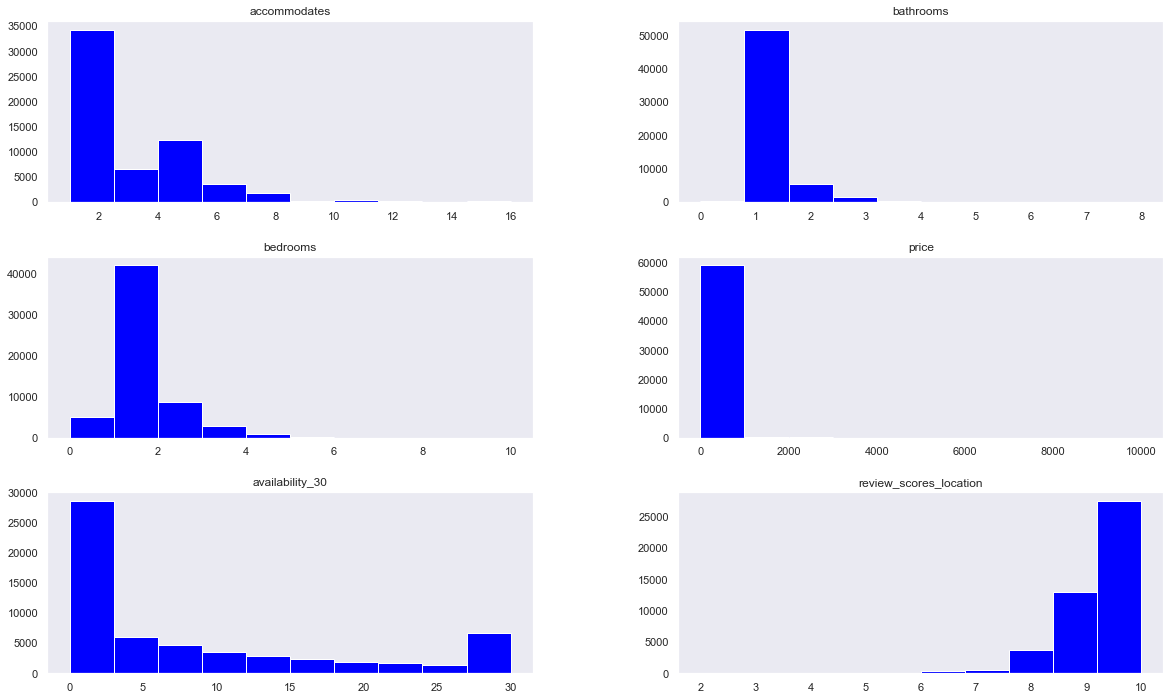

In [35]:
histogram = listings[['accommodates', 'bathrooms', 'bedrooms', 'price',
       'availability_30',
       'review_scores_location']].hist(figsize=(20,12), grid = False, color = 'blue')

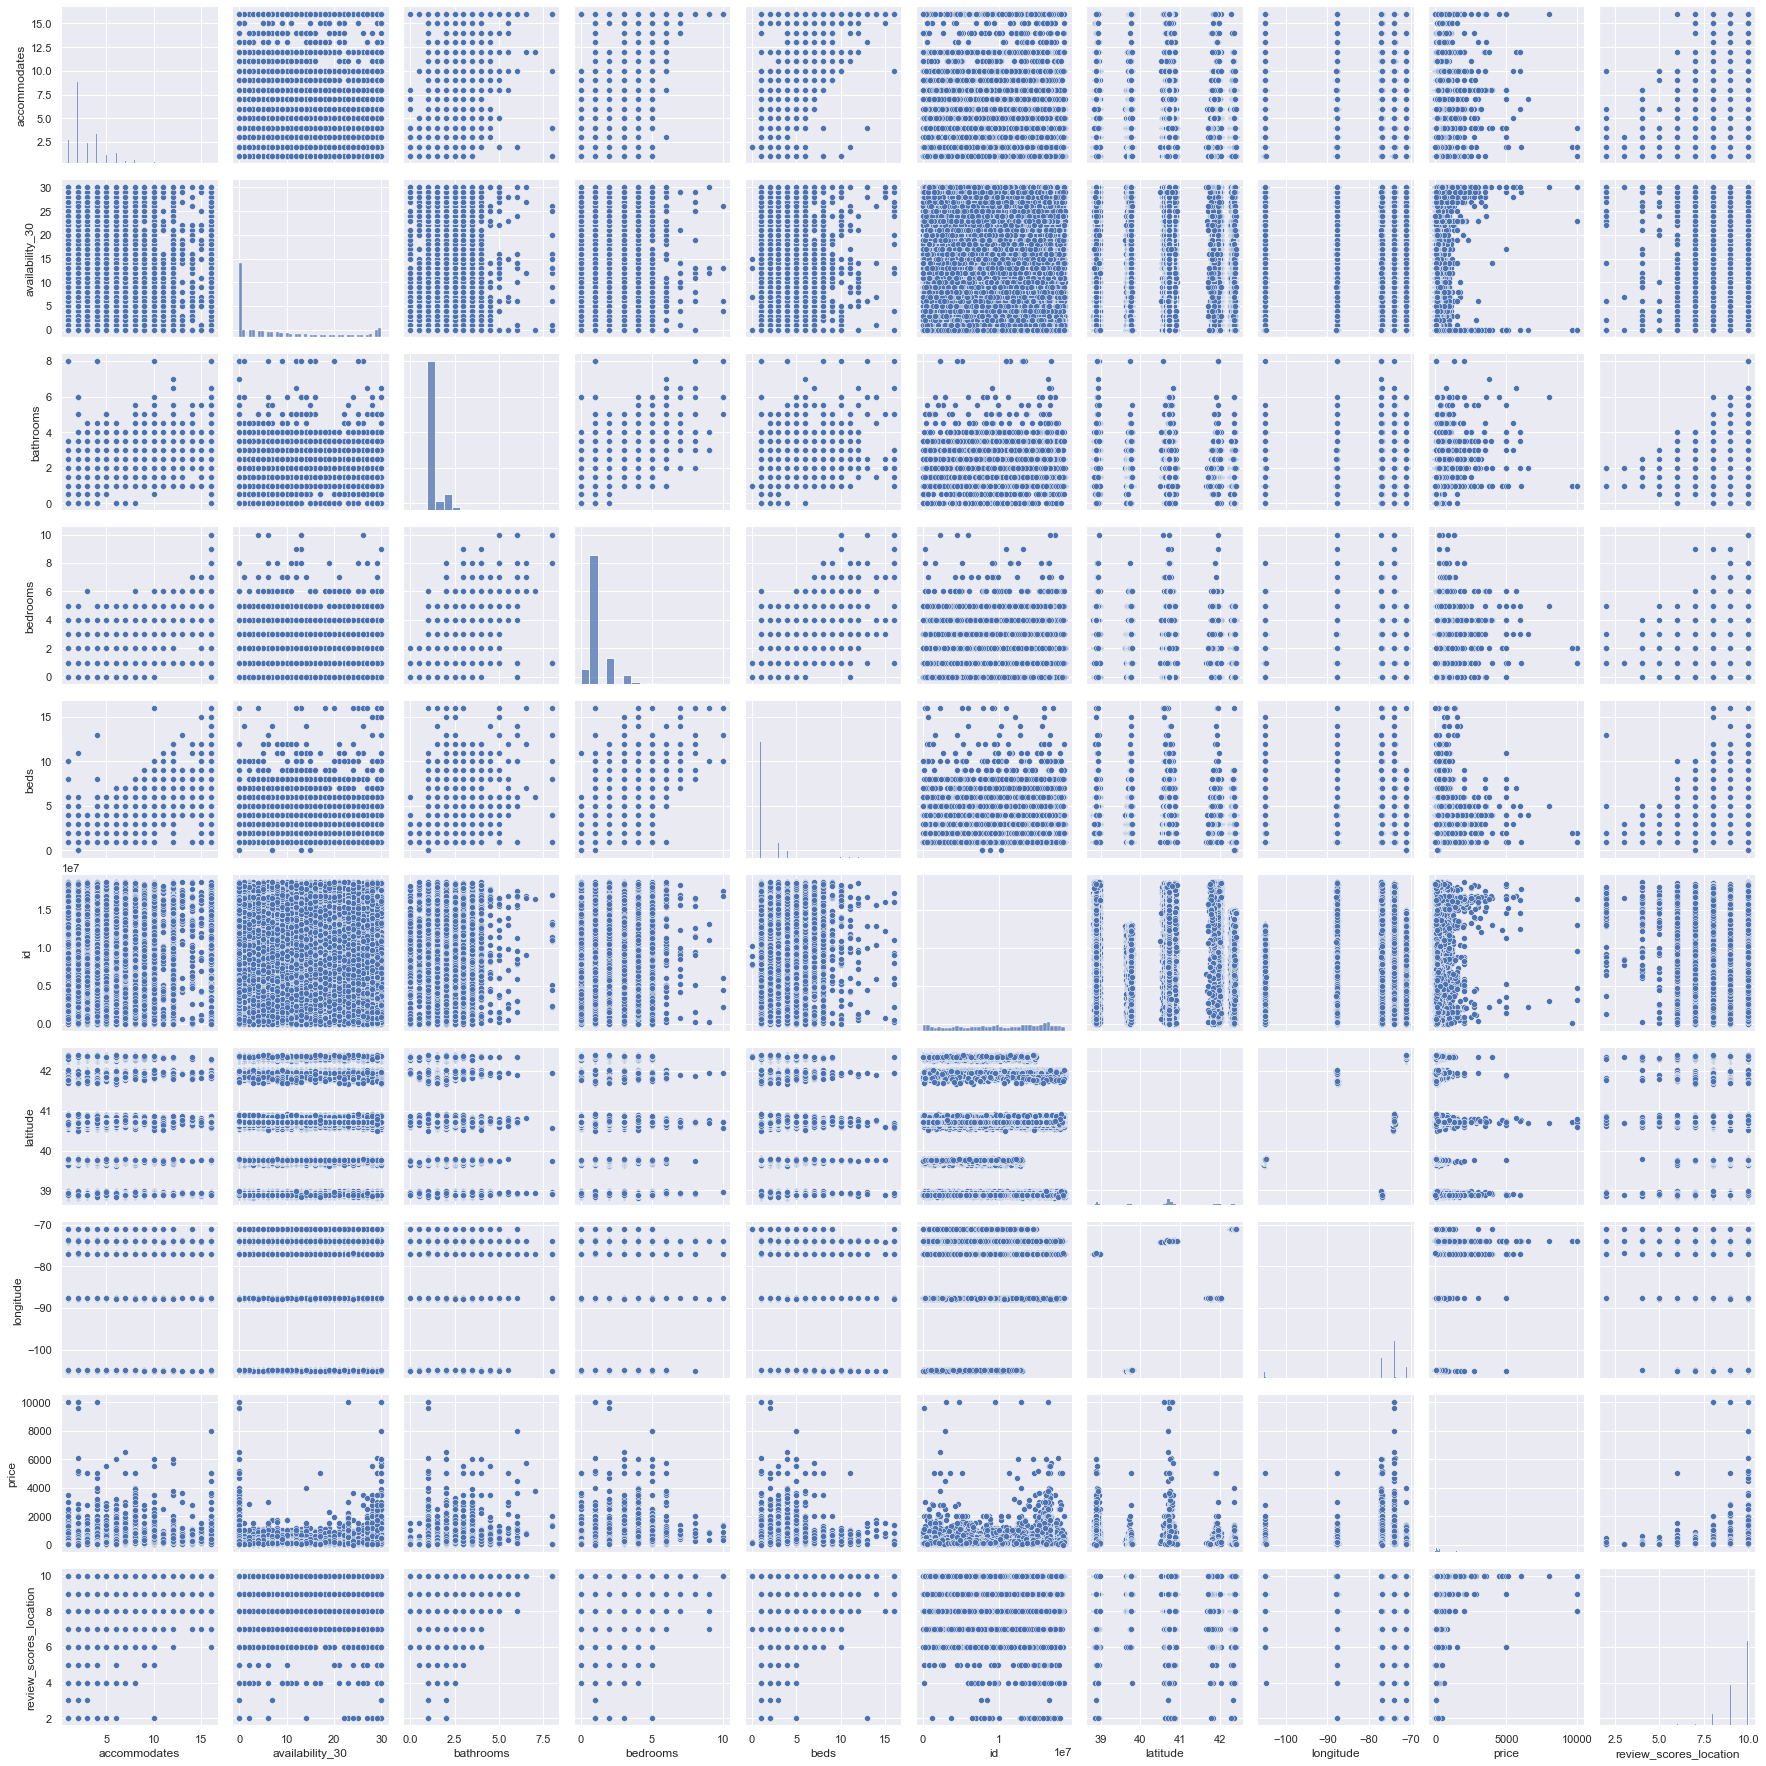

In [36]:
sns.pairplot(listings)

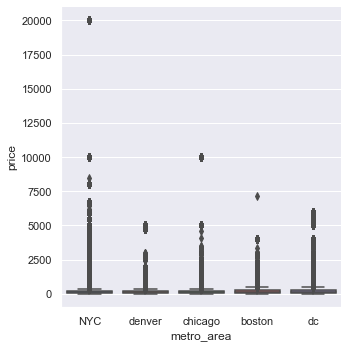

In [37]:
sns.catplot(x="metro_area", y="price", data=calendar, kind="box")

In [38]:
Count_of_Listings = listings.groupby('state').size().sort_values(ascending=[False]).reset_index(name = 'No. of Listings')
Count_of_Listings.head(10)

,state,No. of Listings
0,NY,40738
1,DC,7755
2,IL,5207
3,MA,3585
4,CO,2505
5,MD,31
6,MP,1
7,NJ,1
8,VT,1


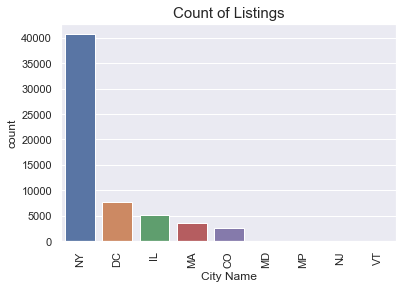

In [39]:
Count_of_Listings = listings["state"].value_counts().head(10).reset_index().rename(columns={'index': 'City Name', 'state':'count'})
ax = sns.barplot(x="City Name", y="count", data=Count_of_Listings)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Count of Listings', fontsize=15)
plt.show()

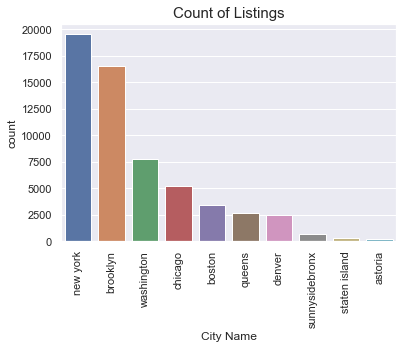

In [40]:
Count_of_Listings = listings["city"].value_counts().head(10).reset_index().rename(columns={'index': 'City Name', 'city':'count'})
ax = sns.barplot(x="City Name", y="count", data=Count_of_Listings)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Count of Listings', fontsize=15)
plt.show()

## Average Price per City: Where is it the most and least expensive to stay, on average, at an Airbnb listing?

In [41]:
price = listings[['price','city']].copy()
mean = price.groupby('city').mean()
top10 = mean['price'].sort_values(ascending=[False]).head(10)
top10

city
chevy chase        1250.000000
chelsea             800.000000
winhall             650.000000
south end           450.000000
chicago heights     350.000000
hyattsville         297.000000
harlem              295.000000
charlestown         262.533333
averne              250.000000
washington          247.690738
Name: price, dtype: float64

In [42]:
bottom10 = mean['price'].sort_values(ascending=[True]).head(10)
bottom10

city
capitol heights    26.818182
evergreen park     30.000000
bedstuy            32.000000
longislandcity     34.000000
calumet park       35.000000
aurora             40.000000
lawrence           40.000000
hollis             44.000000
englewood          47.500000
laurelton          47.500000
Name: price, dtype: float64

## Popularity 

## Price and Average location Rating: How does the average location quality of a listing coorelate to the average price?

Text(0.5, 1.0, 'Price and Average Rating')

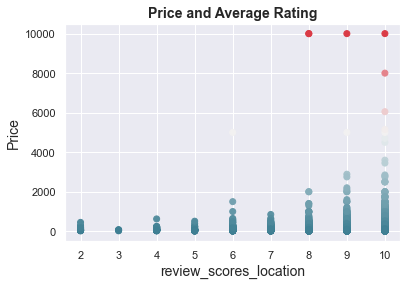

In [43]:
x = listings['review_scores_location']
y = listings['price']

plt.scatter(x, y, c=y,cmap = cmap)
plt.xlabel('review_scores_location', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Average Rating', fontsize=14, fontweight='bold')

In [44]:
# Pulling house pricing data from 2010 to 2017 only
filter_col = [col for col in real_estate if col.startswith('201') ]
drop_cols1 = [col for col in real_estate if col.startswith('199') ]
drop_cols2 = [col for col in real_estate if col.startswith('200') ]
zillow  = real_estate.drop(["county","metro"],axis =1)
zillow  = zillow .drop(drop_cols1,axis =1)
zillow  = zillow .drop(drop_cols2,axis =1)

In [46]:
zillow.nunique().head(10)

type             2
zipcode      17283
city          9060
state           51
size_rank    15911
2010-01       4143
2010-02       4091
2010-03       4098
2010-04       4104
2010-05       4085
dtype: int64

In [47]:
zillow .head()

,type,zipcode,city,state,size_rank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,1,699500.0,709100.0,715800.0,721700.0,729800.0,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,2,297500.0,291600.0,289200.0,288400.0,287600.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,3,352600.0,348500.0,349600.0,350600.0,351600.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,4,115400.0,114800.0,114500.0,114100.0,113400.0,...,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,5,208200.0,202100.0,201100.0,201200.0,202000.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700


In [48]:
zillow [['zipcode','city','state']].isnull().sum()

zipcode    0
city       0
state      0
dtype: int64

## Top 10 States for renting properties as per ZHVI Index

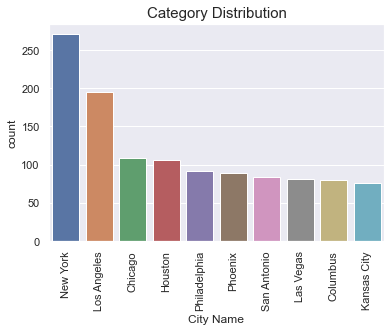

In [49]:
ZHVI_list = zillow ["city"].value_counts().head(10).reset_index().rename(columns={'index': 'City Name', 'city':'count'})
ax = sns.barplot(x="City Name", y="count", data=ZHVI_list)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Category Distribution', fontsize=15)
plt.show()

In [50]:
zillow_NY = zillow[(zillow.city == 'New York')] 
zillow_NY.shape

(271, 95)

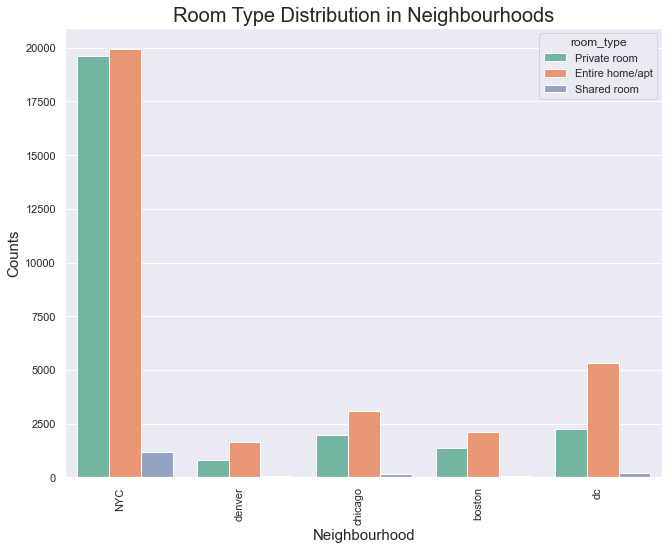

In [51]:
fig, ax = plt.subplots(figsize=(10.7, 8.27))
ax = sns.countplot(x = 'metropolitan', data =listings, hue='room_type',palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Room Type Distribution in Neighbourhoods",fontsize= 20) # title of plot
ax.set_xlabel('Neighbourhood',fontsize = 15) #xlabel
ax.set_ylabel('Counts', fontsize = 15)#ylabel
plt.show()


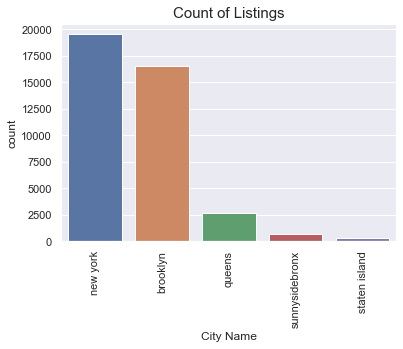

In [53]:
listings_NY = listings[(listings.state == 'NY')] 
Count_of_Listings_NY = listings_NY["city"].value_counts().head(5).reset_index().rename(columns={'index': 'City Name', 'city':'count'})
Count_of_Listings_NY = Count_of_Listings_NY.head(5)
ax = sns.barplot(x="City Name", y="count", data=Count_of_Listings)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Count of Listings', fontsize=15)
plt.show()

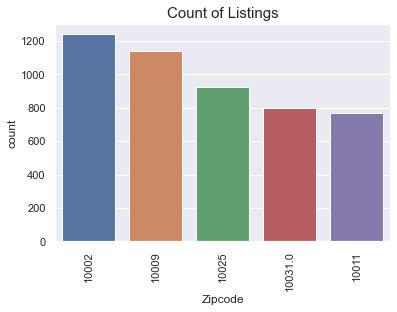

In [54]:
listings_NY_ZIP = listings[(listings.city == 'new york')] 
#listings_NY_ZIP['zipcode'] = listings_NY_ZIP['zipcode'].fillna(0)
Count_of_Listings_ZIP = listings_NY_ZIP["zipcode"].value_counts().head(5).reset_index().rename(columns={'index': 'Zipcode', 'zipcode':'count'})
ax = sns.barplot(x="Zipcode", y="count", data=Count_of_Listings_ZIP)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Count of Listings', fontsize=15)
plt.show()

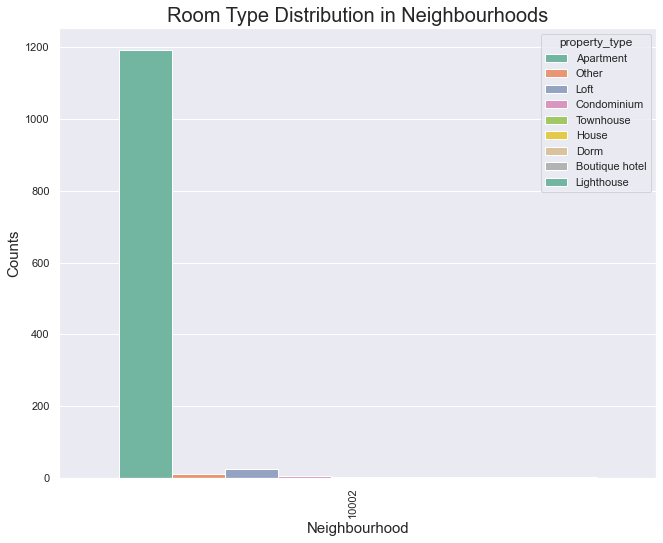

In [55]:
listings_NY_ZIP10002 = listings_NY_ZIP[(listings_NY_ZIP.zipcode == '10002')] 

fig, ax = plt.subplots(figsize=(10.7, 8.27))
ax = sns.countplot(x = 'zipcode', data =listings_NY_ZIP10002, hue='property_type',palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Room Type Distribution in Neighbourhoods",fontsize= 20) # title of plot
ax.set_xlabel('Neighbourhood',fontsize = 15) #xlabel
ax.set_ylabel('Counts', fontsize = 15)#ylabel
plt.show()

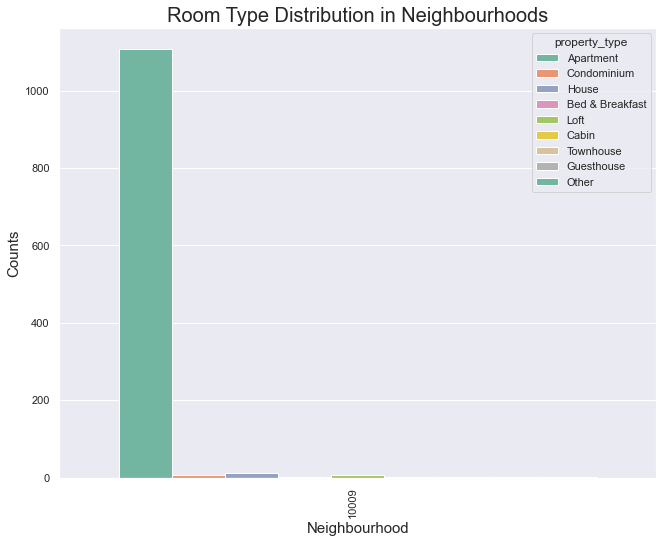

In [56]:
listings_NY_ZIP10009 = listings_NY_ZIP[(listings_NY_ZIP.zipcode == '10009')] 

fig, ax = plt.subplots(figsize=(10.7, 8.27))
ax = sns.countplot(x = 'zipcode', data =listings_NY_ZIP10009, hue='property_type',palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Room Type Distribution in Neighbourhoods",fontsize= 20) # title of plot
ax.set_xlabel('Neighbourhood',fontsize = 15) #xlabel
ax.set_ylabel('Counts', fontsize = 15)#ylabel
plt.show()

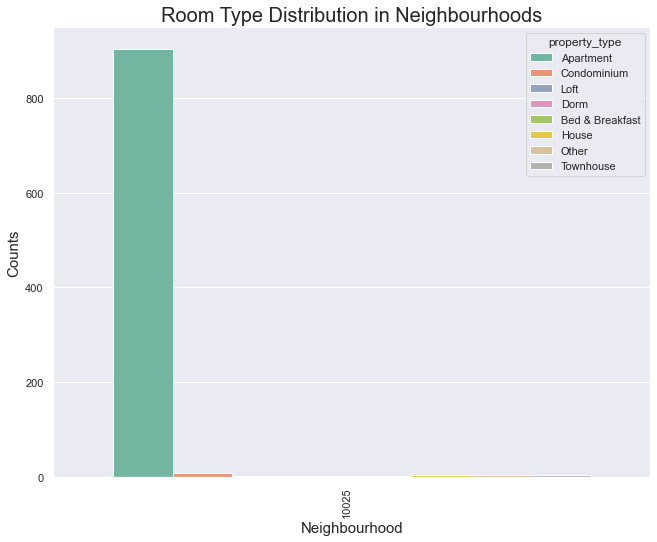

In [57]:
listings_NY_ZIP10025 = listings_NY_ZIP[(listings_NY_ZIP.zipcode == '10025')] 

fig, ax = plt.subplots(figsize=(10.7, 8.27))
ax = sns.countplot(x = 'zipcode', data =listings_NY_ZIP10025, hue='property_type',palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Room Type Distribution in Neighbourhoods",fontsize= 20) # title of plot
ax.set_xlabel('Neighbourhood',fontsize = 15) #xlabel
ax.set_ylabel('Counts', fontsize = 15)#ylabel
plt.show()

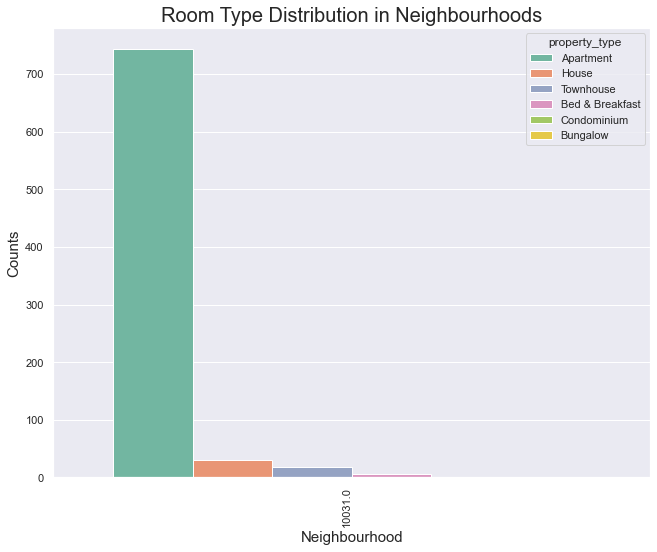

In [58]:
listings_NY_ZIP10031 = listings_NY_ZIP[(listings_NY_ZIP.zipcode == '10031.0')] 

fig, ax = plt.subplots(figsize=(10.7, 8.27))
ax = sns.countplot(x = 'zipcode', data =listings_NY_ZIP10031, hue='property_type',palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Room Type Distribution in Neighbourhoods",fontsize= 20) # title of plot
ax.set_xlabel('Neighbourhood',fontsize = 15) #xlabel
ax.set_ylabel('Counts', fontsize = 15)#ylabel
plt.show()

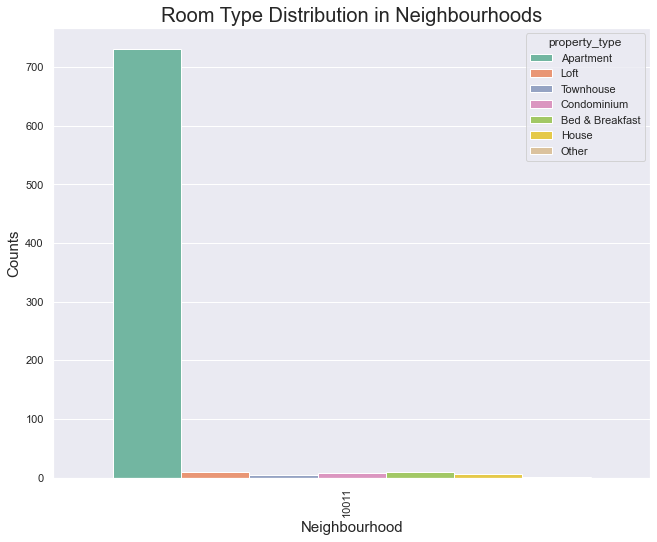

In [59]:
listings_NY_ZIP10011 = listings_NY_ZIP[(listings_NY_ZIP.zipcode == '10011')] 

fig, ax = plt.subplots(figsize=(10.7, 8.27))
ax = sns.countplot(x = 'zipcode', data =listings_NY_ZIP10011, hue='property_type',palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Room Type Distribution in Neighbourhoods",fontsize= 20) # title of plot
ax.set_xlabel('Neighbourhood',fontsize = 15) #xlabel
ax.set_ylabel('Counts', fontsize = 15)#ylabel
plt.show()